# 패션 MINIST 데이터 분석

In [30]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [20]:
data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

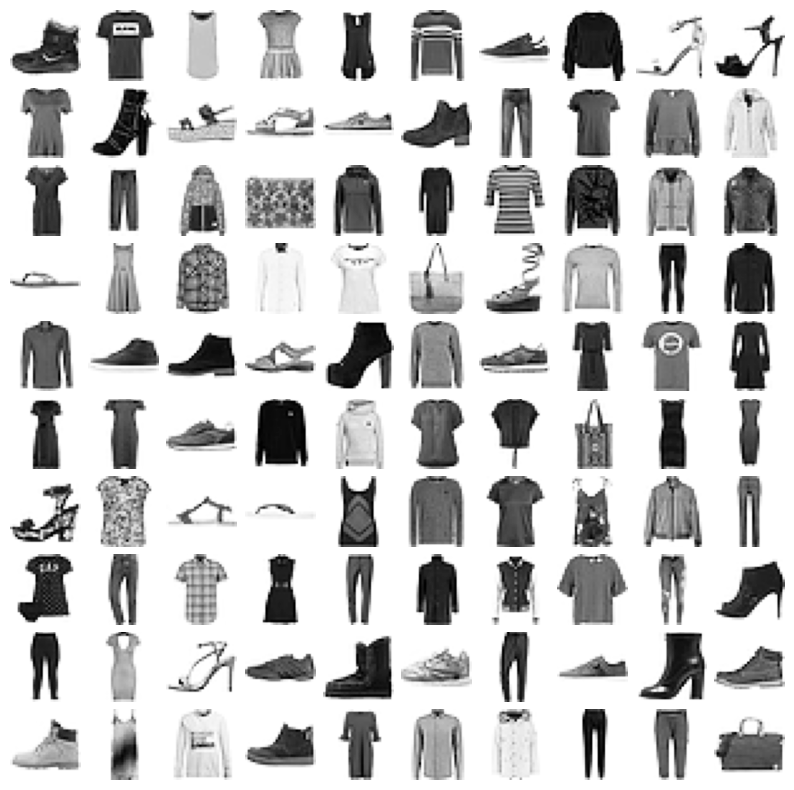

In [21]:
fig, axes = plt.subplots(10, 10, figsize=(10,10))
axes = axes.ravel()

for i in range(100):
    axes[i].imshow(X_train[i], cmap="Greys")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [22]:
for x in X_train[1]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  1  0  0  0  0  41 18810354 48 43 87 16813316 0  0  0  0  0  0  0  0  
0  0  0  1  0  0  0  49 13621921622823625525525525521721525423116045 0  0  0  0  0  
0  0  0  0  0  14 1762222242122031981962002152042022012012012092182241640  0  0  0  
0  0  0  0  0  18821920019820219819919920119619819820020020020020120022541 0  0  0  
0  0  0  0  51 2191992032032122382482502452492462472522482352072032032221400  0  0  
0  0  0  0  11622620620420720410175 47 73 48 50 45 51 63 1132222022062202240  0  0  
0  0  0  0  2002222092032152000  70 98 0  10359 68 71 49 0  21920621421025038 0  0  
0  0  0  0  2472182122102152140  2542431392551742512552050  21521721420822095 0  0  
0  0  0  45 2262142142152242050  42 35 60 16 17 12 13 70 0  1892162122062121560  0  
0  0  0  16423521421122021620152 71 89 94 83 78 70 76 92 87 2062072222132192080  0  
0  0  0  1061872232372482111982522502482452482522532502522392012122252151931130  0  
0  0  0  0  0  17 54 15922219320819219720020020020020120319521016

In [35]:
X_train.dtype

dtype('float64')

In [24]:
X_test.shape

(10000, 28, 28)

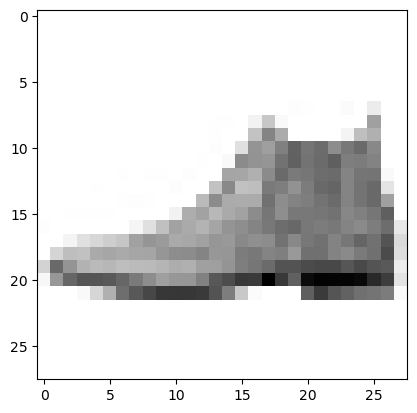

In [41]:
plt.imshow(X_test[0], cmap='Grays')

In [25]:
y_train[1].

0

In [26]:
class_names = dict(zip([0,1,2,3,4,5,6,7,8,9], ['T-shirt', 'Trouser', 'Pullover', 'Dress','Coat','Sandal',
                                               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']))
class_names

{0: 'T-shirt',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [28]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)) / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)) / 255

In [29]:
X_train.shape

(60000, 28, 28, 1)

In [33]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [34]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
modelpath = "./model/fashion_mnist_model.keras"
checkpoint = ModelCheckpoint(filepath=modelpath, save_weights_only=True)
early_stop = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=2000, batch_size=2000, validation_split=0.25, 
                   callbacks=[checkpoint, early_stop])


Epoch 1/2000


2024-09-12 14:45:20.445521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-12 14:45:20.569972: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 14:45:20.570103: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-12 14:45:20.573915: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 14:45:20.574005: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

23/23 [==============================] - ETA: 0s - loss: 2.2960 - accuracy: 0.1517

2024-09-12 14:45:26.813391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-12 14:45:26.875661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 14:45:26.875819: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-12 14:45:26.889578: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 14:45:26.889730: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

23/23 [==============================] - 8s 286ms/step - loss: 2.2960 - accuracy: 0.1517 - val_loss: 2.2582 - val_accuracy: 0.2656
Epoch 2/2000
23/23 [==============================] - 6s 245ms/step - loss: 2.0184 - accuracy: 0.3128 - val_loss: 1.4992 - val_accuracy: 0.3949
Epoch 3/2000
23/23 [==============================] - 5s 223ms/step - loss: 1.3583 - accuracy: 0.4300 - val_loss: 1.1036 - val_accuracy: 0.5547
Epoch 4/2000
23/23 [==============================] - 6s 247ms/step - loss: 1.1646 - accuracy: 0.5079 - val_loss: 1.0042 - val_accuracy: 0.5917
Epoch 5/2000
23/23 [==============================] - 6s 247ms/step - loss: 1.0766 - accuracy: 0.5561 - val_loss: 0.9233 - val_accuracy: 0.6218
Epoch 6/2000
23/23 [==============================] - 6s 245ms/step - loss: 0.9981 - accuracy: 0.5994 - val_loss: 0.8463 - val_accuracy: 0.6719
Epoch 7/2000
23/23 [==============================] - 5s 234ms/step - loss: 0.9264 - accuracy: 0.6388 - val_loss: 0.7714 - val_accuracy: 0.7071
Epoch

23/23 [==============================] - 5s 214ms/step - loss: 0.4492 - accuracy: 0.8340 - val_loss: 0.3858 - val_accuracy: 0.8547
Epoch 58/2000
23/23 [==============================] - 5s 215ms/step - loss: 0.4435 - accuracy: 0.8365 - val_loss: 0.3850 - val_accuracy: 0.8559
Epoch 59/2000
23/23 [==============================] - 5s 214ms/step - loss: 0.4423 - accuracy: 0.8365 - val_loss: 0.3798 - val_accuracy: 0.8568
Epoch 60/2000
23/23 [==============================] - 5s 214ms/step - loss: 0.4401 - accuracy: 0.8363 - val_loss: 0.3772 - val_accuracy: 0.8594
Epoch 61/2000
23/23 [==============================] - 6s 243ms/step - loss: 0.4389 - accuracy: 0.8381 - val_loss: 0.3795 - val_accuracy: 0.8560
Epoch 62/2000
23/23 [==============================] - 5s 231ms/step - loss: 0.4369 - accuracy: 0.8403 - val_loss: 0.3756 - val_accuracy: 0.8595
Epoch 63/2000
23/23 [==============================] - 5s 228ms/step - loss: 0.4295 - accuracy: 0.8434 - val_loss: 0.3736 - val_accuracy: 0.8599

23/23 [==============================] - 5s 236ms/step - loss: 0.3498 - accuracy: 0.8713 - val_loss: 0.3170 - val_accuracy: 0.8824
Epoch 114/2000
23/23 [==============================] - 5s 225ms/step - loss: 0.3488 - accuracy: 0.8729 - val_loss: 0.3212 - val_accuracy: 0.8806
Epoch 115/2000
23/23 [==============================] - 5s 225ms/step - loss: 0.3551 - accuracy: 0.8696 - val_loss: 0.3149 - val_accuracy: 0.8835
Epoch 116/2000
23/23 [==============================] - 5s 223ms/step - loss: 0.3502 - accuracy: 0.8721 - val_loss: 0.3160 - val_accuracy: 0.8835
Epoch 117/2000
23/23 [==============================] - 5s 219ms/step - loss: 0.3511 - accuracy: 0.8696 - val_loss: 0.3222 - val_accuracy: 0.8793
Epoch 118/2000
23/23 [==============================] - 5s 222ms/step - loss: 0.3475 - accuracy: 0.8718 - val_loss: 0.3158 - val_accuracy: 0.8838
Epoch 119/2000
23/23 [==============================] - 5s 219ms/step - loss: 0.3435 - accuracy: 0.8744 - val_loss: 0.3141 - val_accuracy: 

23/23 [==============================] - 5s 226ms/step - loss: 0.3014 - accuracy: 0.8890 - val_loss: 0.2986 - val_accuracy: 0.8944
Epoch 170/2000
23/23 [==============================] - 6s 260ms/step - loss: 0.2998 - accuracy: 0.8909 - val_loss: 0.2895 - val_accuracy: 0.8956
Epoch 171/2000
23/23 [==============================] - 5s 230ms/step - loss: 0.2946 - accuracy: 0.8922 - val_loss: 0.2878 - val_accuracy: 0.8952
Epoch 172/2000
23/23 [==============================] - 5s 227ms/step - loss: 0.2965 - accuracy: 0.8915 - val_loss: 0.2883 - val_accuracy: 0.8937
Epoch 173/2000
23/23 [==============================] - 5s 218ms/step - loss: 0.2982 - accuracy: 0.8904 - val_loss: 0.2888 - val_accuracy: 0.8931
Epoch 174/2000
23/23 [==============================] - 5s 218ms/step - loss: 0.2968 - accuracy: 0.8911 - val_loss: 0.2884 - val_accuracy: 0.8937
Epoch 175/2000
23/23 [==============================] - 6s 243ms/step - loss: 0.2988 - accuracy: 0.8912 - val_loss: 0.2851 - val_accuracy: 

23/23 [==============================] - 5s 218ms/step - loss: 0.2643 - accuracy: 0.9041 - val_loss: 0.2773 - val_accuracy: 0.9006
Epoch 226/2000
23/23 [==============================] - 5s 219ms/step - loss: 0.2622 - accuracy: 0.9040 - val_loss: 0.2677 - val_accuracy: 0.9024
Epoch 227/2000
23/23 [==============================] - 5s 222ms/step - loss: 0.2640 - accuracy: 0.9040 - val_loss: 0.2729 - val_accuracy: 0.9012
Epoch 228/2000
23/23 [==============================] - 5s 220ms/step - loss: 0.2637 - accuracy: 0.9032 - val_loss: 0.2742 - val_accuracy: 0.9011
Epoch 229/2000
23/23 [==============================] - 5s 220ms/step - loss: 0.2623 - accuracy: 0.9030 - val_loss: 0.2704 - val_accuracy: 0.9033
Epoch 230/2000
23/23 [==============================] - 5s 219ms/step - loss: 0.2570 - accuracy: 0.9047 - val_loss: 0.2713 - val_accuracy: 0.9019
Epoch 231/2000
23/23 [==============================] - 5s 219ms/step - loss: 0.2642 - accuracy: 0.9044 - val_loss: 0.2746 - val_accuracy: 

23/23 [==============================] - 5s 230ms/step - loss: 0.2387 - accuracy: 0.9127 - val_loss: 0.2649 - val_accuracy: 0.9065
Epoch 282/2000
23/23 [==============================] - 5s 225ms/step - loss: 0.2336 - accuracy: 0.9155 - val_loss: 0.2674 - val_accuracy: 0.9045
Epoch 283/2000
23/23 [==============================] - 6s 247ms/step - loss: 0.2369 - accuracy: 0.9128 - val_loss: 0.2649 - val_accuracy: 0.9049
Epoch 284/2000
23/23 [==============================] - 5s 235ms/step - loss: 0.2328 - accuracy: 0.9144 - val_loss: 0.2622 - val_accuracy: 0.9059
Epoch 285/2000
23/23 [==============================] - 5s 223ms/step - loss: 0.2321 - accuracy: 0.9148 - val_loss: 0.2598 - val_accuracy: 0.9062
Epoch 286/2000
23/23 [==============================] - 6s 244ms/step - loss: 0.2307 - accuracy: 0.9157 - val_loss: 0.2640 - val_accuracy: 0.9061
Epoch 287/2000
23/23 [==============================] - 5s 235ms/step - loss: 0.2271 - accuracy: 0.9166 - val_loss: 0.2704 - val_accuracy: 

In [36]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 3s 10ms/step - loss: 24.5879 - accuracy: 0.4439
[24.5878963470459, 0.4438999891281128]
